## *** Sentiment Analysis of Tweets: Understanding Public Opinion on Social Media ***

___
### Dataset Introduction

This dataset contains tweets related to various topics or entities, along with sentiment analysis. The data is collected from Twitter and focuses on capturing user opinions and experiences shared via tweets. The tweets are categorized by sentiment, and each entry includes information about the entity being discussed. This type of dataset can be useful for analyzing public perception, tracking brand reputation, and identifying key topics or trends.
___

___
#### ** Columns in the Dataset **

    Tweet ID:
        Description: A unique identifier assigned to each tweet. This ID is essential for referencing individual tweets within the dataset and for linking them to other relevant data if needed (e.g., replies, retweets).
        Example: 9200

    Sentiment:
        Description: The sentiment classification of the tweet, which can typically be Positive, Negative, or Neutral. This sentiment is usually determined through natural language processing (NLP) techniques to understand the general emotion conveyed in the tweet.
        Example: Positive

    Entity:
        Description: The entity or brand being discussed in the tweet. This could refer to a company, product, or any other notable subject being mentioned or referenced. For example, the entity might be "Borderlands" or "Madden NFL" if the tweet is discussing a specific video game.
        Example: Borderlands 3

    Tweet Text:
        Description: The full text of the tweet, which contains the user's opinion, feedback, or statement. This column allows us to perform detailed analysis, such as extracting specific keywords or phrases associated with particular sentiments or entities.
        Example: "I love playing #Borderlands3! It's so much fun!"
___

### Step-1 : Import necessary libraries

In [1]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization (e.g., plotting graphs)
from wordcloud import WordCloud  # For generating word clouds from text data
import seaborn as sns  # Statistical data visualization library, builds on matplotlib for attractive, informative plots

### Step-2 Load the dataset

In [2]:
# Load the dataset without headers
df_sentiment= pd.read_csv('twitter_training(1).csv', header=None)

# Assign column names manually
df_sentiment.columns = ['Tweet_id','entity', 'Sentiment',  'Tweet Text']

# Show the first few rows with the new column names
df_sentiment.head()


,Tweet_id,entity,Sentiment,Tweet Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


___
The dataset was initially loaded without headers, so it didn’t have any column names. After examining the content of each column, descriptive and contextually appropriate column names were assigned: 'Tweet_id', 'entity', 'Sentiment', and 'Tweet Text'. 
___

### Step-3 Data Cleaning

#### 3.1 Check and handle duplicated rows 

In [3]:
# Count duplicate rows (excluding the first occurrence)
duplicate_count = df_sentiment.duplicated().sum()

print(f"Number of duplicate rows : {duplicate_count}")

# Remove duplicates, keeping the first occurrence
df_no_duplicates = df_sentiment.drop_duplicates()

Number of duplicate rows : 2701


####  _View concise summary of the dataset_

In [4]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71981 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    71981 non-null  int64 
 1   entity      71981 non-null  object
 2   Sentiment   71981 non-null  object
 3   Tweet Text  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


#### *Observations
The dataset consists of 71,981 entries with four columns: `Tweet_id`, `entity`, `Sentiment`, and `Tweet Text`. Key observations include:

- **Non-Null Values**:
    - The `Tweet_id`, `entity`, and `Sentiment` columns are complete, each containing **71,981 non-null values**.
    - However, the `Tweet Text` column has **71,655 non-null values**, indicating **326 missing entries** (i.e., ~0.45% of the data lacks tweet text).


#### 3.2 Remove rows with missing 'Tweet Text'

In [5]:
# Remove rows with missing 'Tweet Text'
df_no_duplicates = df_no_duplicates.dropna(subset=['Tweet Text'])

# Verify the result by checking the data again
print(df_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    71655 non-null  int64 
 1   entity      71655 non-null  object
 2   Sentiment   71655 non-null  object
 3   Tweet Text  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB
None


### Reasons for Dropping Rows with Missing Tweet Text

- **Reasonablly minimal Data Loss**:  
  With only 326 missing values out of 71,655 rows, removing these rows has a minimal impact on the overall dataset size. The loss is small compared to the total amount of data, ensuring that the analysis will still be representative.

- **Ensures Data Quality**:  
  Rows with missing **Tweet Text** are incomplete and can't contribute meaningfully to sentiment analysis or text-based tasks. Removing them ensures that you're working with clean, relevant data.

- **Improved Analysis Accuracy**:  
  Sentiment analysis and text analysis require full-text data to assess meaning accurately. Rows without text could lead to errors or skewed results in the analysis if left in the dataset.

#### 3.3,Final Check for Cleaning

In [6]:
null_count=df_no_duplicates.duplicated().sum()
no_dup_count=df_no_duplicates.duplicated().sum()
print(f"Number of null values in the dataset is:{null_count}")
print(f"Number of duplicate rows after dropping duplicates: {no_dup_count}")

Number of null values in the dataset is:0
Number of duplicate rows after dropping duplicates: 0


### Step-4,Exploratory Data Analysis

#### 4.1 Distribution of Sentiment Categories:



In [7]:
# Count the occurrences of each sentiment category
sentiment_counts = df_no_duplicates['Sentiment'].value_counts()

# Display the counts
print("Distribution of Sentiment Categories:")
print(sentiment_counts)


Distribution of Sentiment Categories:
Sentiment
Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: count, dtype: int64


___
#### _Observations_
- **Negative** sentiment is the most prevalent, with the highest number of tweets (21,698), indicating a greater focus on negative sentiment within this dataset.
- **Positive** sentiment comes second, with 19,713 tweets, closely following negative sentiment.
- **Neutral** sentiment is slightly less frequent, comprising 17,707 tweets.
- **Irrelevant** tweets are the least frequent, with 12,537 entries, suggesting a smaller portion of the dataset is dedicated to tweets considered irrelevant to sentiment analysis.
___



#### **_Decision to remove irrelevant tweets_**

**Irrelevant tweets** refer to entries in the dataset that do not contain sentiment-laden content or are unrelated to the subject of sentiment analysis. These tweets could include:

- **Non-sentiment-related content**: Tweets that are simply announcements, URLs, spam, or advertisements without any emotional tone or opinion.
- **Empty or minimal content**: Tweets that contain little to no text or are too vague to analyze for sentiment (e.g., one-word responses, emojis without context, or irrelevant hashtags).
- **Off-topic content**: Tweets that do not align with the intended topic of sentiment analysis, such as random text or discussions unrelated to the sentiment the analysis aims to explore.

**Reason for removal**: Removing irrelevant tweets ensures that the dataset is composed only of tweets that provide valuable information for sentiment analysis. This allows us to focus on content that conveys emotions or opinions, which improves the accuracy of sentiment classification models and insights. By eliminating irrelevant data, the analysis becomes more focused, reliable, and meaningful.


##### _Filter out irrelevant tweets_

In [8]:
df_relevant = df_no_duplicates[df_no_duplicates['Sentiment'] != 'Irrelevant']
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59118 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_id    59118 non-null  int64 
 1   entity      59118 non-null  object
 2   Sentiment   59118 non-null  object
 3   Tweet Text  59118 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


For further analysis and visualization, the dataset `df_relevant` will be used. This dataset contains the following:

- **Cleaned data**: Tweets that have been processed for consistency and quality.
- **Non-duplicate entries**: Duplicates have been removed to ensure unique data points.
- **Relevant tweets only**: Irrelevant tweets, which do not contribute to sentiment analysis, have been excluded.
- **Cleaned tweets**: Tweets have been cleaned of unnecessary elements such as special characters and URLs.

This refined dataset will be used for more accurate sentiment analysis and visualizations.

#### _Bar chart for sentiment distribution_

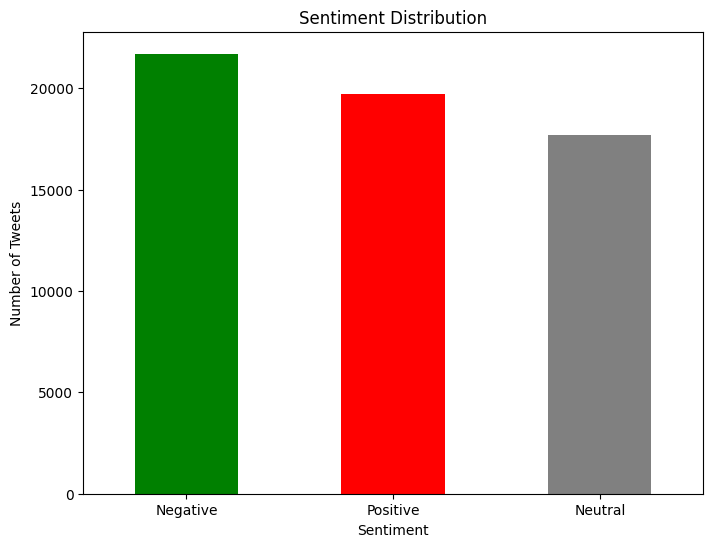

In [9]:
# Calculate the sentiment distribution
sentiment_counts = df_relevant['Sentiment'].value_counts()

# Plot the sentiment distribution as a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])  # Adjust colors to suit Positive, Negative, Neutral
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)  # Rotate x-axis labels to keep them horizontal
plt.show()

### Interpretation for the bar graph

- **Overall positive sentiment is dominant**, with over 20,000 tweets classified as positive, indicating that people are mostly sharing favorable opinions or feelings about the topic or entity being discussed.

- **Negative sentiment follows** ,with about 21,000 tweets This suggests that while there are some critical or unfavorable opinions, they are not the dominant sentiment.

- **Neutral sentiment is the least common**, with around 17,000 tweets. This indicates that there are a considerable number of tweets where the sentiment is neither strongly positive nor negative, potentially representing neutral discussions or fact-based statements.


#### 4.2 Generate Word Clouds for "Positive" and "Negative" Sentiments

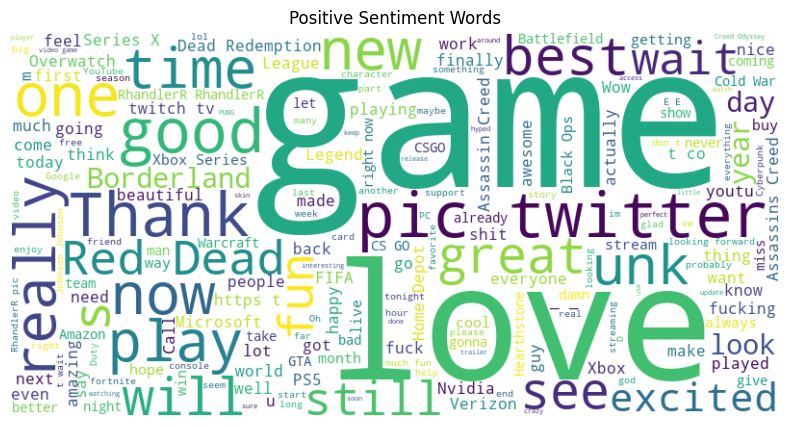

In [10]:
# Function to generate word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive sentiment word cloud (using 'Tweet Text' column)
plot_wordcloud(df_relevant[df_relevant['Sentiment'] == 'Positive']['Tweet Text'], 'Positive Sentiment Words')

___
#### ***Observation***
The positive sentiment word cloud prominently features words such as **good**, **love**, **best**, **thank**, **legend**, **amazing**, **awesome**, **cool**, **better**, **great**, **happy**, **win**, **excited**, **fun**, **nice**, **beautiful**, and **wow**. These terms suggest that users are expressing strong appreciation, positivity, and gratitude towards the subject or entity. The frequent use of such words indicates an overwhelmingly favorable and enthusiastic tone in the positive sentiment tweets.
___

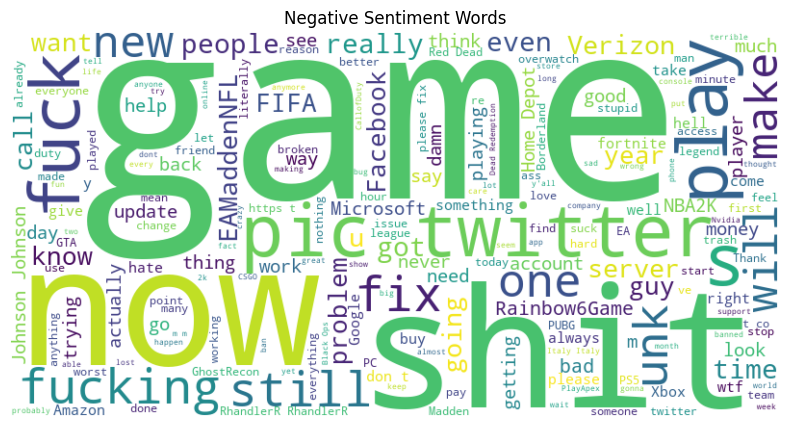

In [11]:
# Negative sentiment word cloud (using 'Tweet Text' column)
plot_wordcloud(df_relevant[df_relevant['Sentiment'] == 'Negative']['Tweet Text'], 'Negative Sentiment Words')

___
#### ***Observation***
Words like **shit**, **fuck**, **fucking**, **problem**, **bad**, **hate**, **hard**, **worst**, **crazy**, **suck**, and **damn**, along with **can't**, **don't**, and **terrible**, were observed in the negative sentiment word cloud. These words reflect strong negative emotions, frustration, and dissatisfaction. The presence of such terms suggests that users are expressing criticism, anger, or disapproval towards the topic or entity being discussed.
___


### 4.3 Visulizing Attitudes towards the Entities/Brands

#### _Entities/Brands/Companies in the dataset_

In [12]:
# Get the unique values from the 'entity' column
unique_entities = df_relevant['entity'].unique()

# Display the unique entities
print(unique_entities)

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


___
***The entities in this dataset are popular **brands, games, and companies**  Here's a breakdown of what they represent:

### Video Games:
- **Borderlands**: A popular first-person shooter game series known for its humor and open-world gameplay.
- **CallOfDutyBlackopsColdWar**: A title in the Call of Duty franchise, focusing on Cold War-era espionage and combat.
- **Overwatch**: A team-based multiplayer first-person shooter game with unique characters, known for its colorful and diverse world.
- **NBA2K**: A basketball video game series featuring real-life NBA teams and players.
- **Dota2**: A popular multiplayer online battle arena (MOBA) game.
- **PlayStation5(PS5)**: The fifth-generation gaming console from Sony, with exclusive games and enhanced graphics.
- **CS-GO (Counter-Strike: Global Offensive)**: A multiplayer first-person shooter game focused on tactical team-based action.
- **AssassinsCreed**: An action-adventure game series focusing on historical settings and stealth-based gameplay.
- **ApexLegends**: A free-to-play battle royale game featuring heroes with unique abilities.
- **LeagueOfLegends**: A popular multiplayer online battle arena (MOBA) game.
- **Fortnite**: A highly popular battle royale game known for its building mechanics and live events.
- **RedDeadRedemption(RDR)**: A western-themed action-adventure game.
- **Cyberpunk2077**: A sci-fi open-world action RPG set in a dystopian future.
- **GrandTheftAuto(GTA)**: An action-adventure series known for its open-world environments and crime-based storylines.
- **MaddenNFL**: An NFL (National Football League) football video game series.
- **FIFA**: A soccer video game series known for its realistic gameplay and licensing with real-life teams and players.
- **TomClancysRainbowSix**: A tactical first-person shooter game featuring counter-terrorist operations.
- **TomClancysGhostRecon**: A military tactical shooter game.
- **Battlefield**: A series of first-person shooter games focusing on large-scale battles and military combat.

### Companies/Brands:
- **Amazon**: One of the largest e-commerce companies globally.
- **Microsoft**: A major technology company, known for products like Windows, Xbox, and Office software.
- **Google**: A multinational technology company best known for its search engine, Android OS, and other internet services.
- **Verizon**: A major telecommunications company offering mobile, internet, and TV services.
- **HomeDepot**: A large American home improvement retail company.
- **Johnson&Johnson**: A multinational corporation known for medical devices, pharmaceuticals, and consumer health products.

### Game Consoles:
- **Xbox(Xseries)**: A video game console from Microsoft, known for its next-gen hardware and exclusive games.
- **PlayStation5(PS5)**: The latest console from Sony with powerful features and exclusive games.

### Online Games & Platforms:
- **PlayerUnknownsBattlegrounds(PUBG)**: A popular battle royale game.
- **Hearthstone**: A card game based on the World of Warcraft universe.
- **WorldOfCraft**: Likely referring to **World of Warcraft**, a massively multiplayer online role-playing game (MMORPG).

These names represent brands, game franchises, and companies that have significant influence in the world of gaming, technology, and entertainment. Most of them have massive fan bases, online communities, and media coverage.
___

#### _Entities with highest positive sentiment_ 

In [13]:
# Filter the dataset for positive sentiment
positive_sentiment_df = df_relevant[df_relevant['Sentiment'] == 'Positive']

# Group by the entity and count the number of occurrences
positive_entity_counts = positive_sentiment_df['entity'].value_counts()

# Get the top 3 entities with the highest count of positive sentiments
top_3_positive_entities = positive_entity_counts.head(3)

# Display the top 3 entities with the highest positive sentiment count
print(top_3_positive_entities)


entity
AssassinsCreed    1382
Borderlands        972
Cyberpunk2077      902
Name: count, dtype: int64


#### _Entities with highest negative sentiment_ 

In [14]:
# Get the count of negative sentiment for each entity
negative_entity_counts = df_relevant[df_relevant['Sentiment'] == 'Negative']['entity'].value_counts()

# Select the top 3 entities with the highest negative sentiment counts
top_3_negative_entities = negative_entity_counts.head(3)

# Display the top 3 negative entities with their counts
print(top_3_negative_entities)


entity
MaddenNFL    1665
NBA2K        1450
FIFA         1127
Name: count, dtype: int64


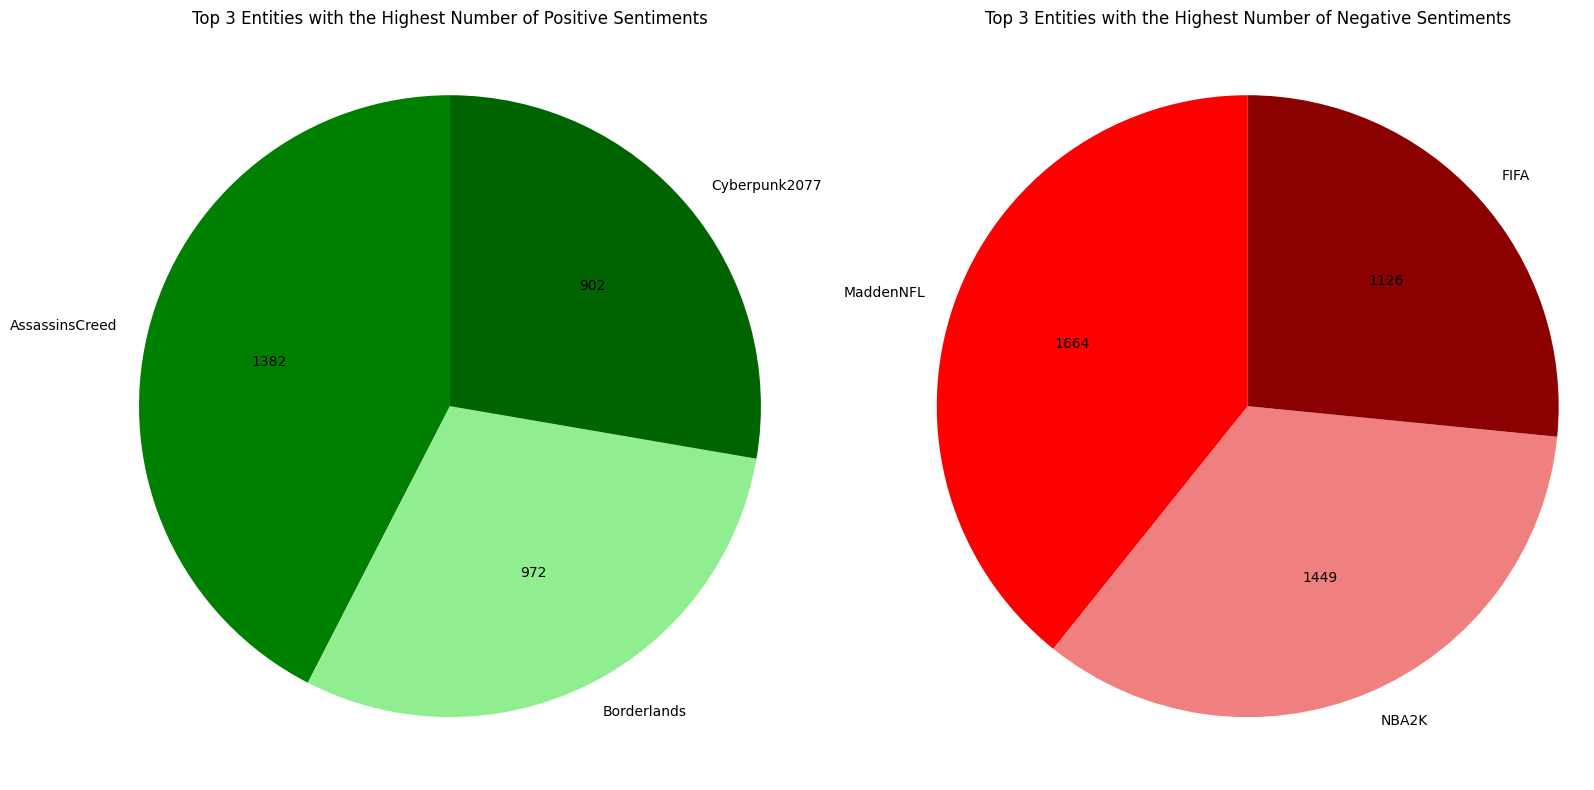

In [15]:
# Get the count of positive sentiment for each entity
positive_entity_counts = df_relevant[df_relevant['Sentiment'] == 'Positive']['entity'].value_counts()

# Select the top 3 entities with the highest positive sentiment counts
top_3_positive_entities = positive_entity_counts.head(3)

# Get the count of negative sentiment for each entity
negative_entity_counts = df_relevant[df_relevant['Sentiment'] == 'Negative']['entity'].value_counts()

# Select the top 3 entities with the highest negative sentiment counts
top_3_negative_entities = negative_entity_counts.head(3)

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Positive sentiment pie chart
ax[0].pie(top_3_positive_entities, labels=top_3_positive_entities.index,
          autopct=lambda p: f'{int(p * sum(top_3_positive_entities) / 100)}',
          startangle=90, colors=['green', 'lightgreen', 'darkgreen'])
ax[0].set_title('Top 3 Entities with the Highest Number of Positive Sentiments')
ax[0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Negative sentiment pie chart
ax[1].pie(top_3_negative_entities, labels=top_3_negative_entities.index,
          autopct=lambda p: f'{int(p * sum(top_3_negative_entities) / 100)}',
          startangle=90, colors=['red', 'lightcoral', 'darkred'])
ax[1].set_title('Top 3 Entities with the Highest Number of Negative Sentiments')
ax[1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.tight_layout()
plt.show()


___
#### **_Interpretation for the pie charts_**
#### *** Top 3 Entities with highest number of positive sentiment***
- **AssassinsCreed** leads with the highest number of positive sentiments, totaling **1382** mentions. This suggests that users are generally enthusiastic and appreciative towards this entity, making it the most positively received among the top 3.
  
- **Borderlands** follows with **972** mentions, showing a strong positive sentiment but slightly less than **AssassinsCreed**. The positive reception indicates that this entity also enjoys significant appreciation, although not as much as **AssassinsCreed**.

- **Cyberpunk2077** has **902** positive mentions, which, while still a substantial number, places it third in the ranking. The positive sentiment indicates that users view this entity favorably, though it appears to have slightly fewer positive mentions compared to the other two.
___

___
#### *** Top 3 Entities with highest number of negative sentiment***
- **MaddenNFL** has the highest number of negative mentions, with **1665** mentions, indicating that this entity received the most criticism or dissatisfaction from users among the top three. This may reflect specific issues or frustrations that users frequently associate with it.

- **NBA2K** follows with **1450** negative mentions, showing it also faces significant negative sentiment, though somewhat less than **MaddenNFL**. This suggests that while **NBA2K** encounters substantial criticism, it is slightly less than that directed at **MaddenNFL**.

- **FIFA** has **1127** negative mentions, placing it third in the ranking of entities with the highest negative sentiment. Although this count is lower than that of **MaddenNFL** and **NBA2K**, it still indicates considerable dissatisfaction or frustration from users.
___

### Visulizing Attitudes towards all Entities/Brands,Games,Platforms

<Figure size 1200x800 with 0 Axes>

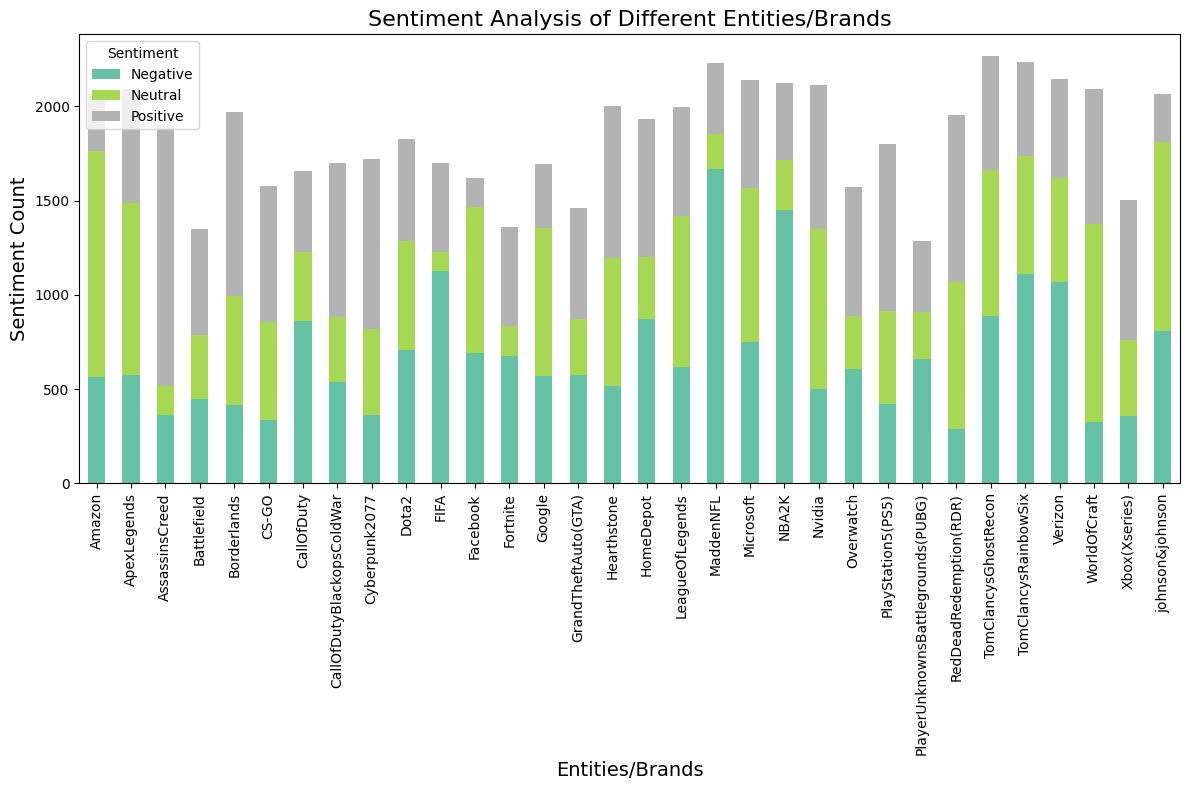

In [16]:
# Create a DataFrame to store sentiment counts for each entity/brand
sentiment_counts = df_relevant.groupby(['entity', 'Sentiment']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))
sentiment_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 8))

# Adding labels and title
plt.title('Sentiment Analysis of Different Entities/Brands', fontsize=16)
plt.xlabel('Entities/Brands', fontsize=14)
plt.ylabel('Sentiment Count', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Sentiment', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation of the bar graph :  the Sentiment analysis towards all entities
___
#### **_Analysis of entities based on positive sentiment_**
- **Top Positive Sentiment Entities**:  
  - *AssassinsCreed*, *Borderlands*, and *Cyberpunk2077* are the entities with the highest positive sentiment counts. This indicates a particularly strong level of appreciation, enthusiasm, or satisfaction among users for these brands, highlighting their favorable reception.

- **Lowest Positive Sentiment Entity**:  
  - *Johnson & Johnson* shows the lowest count of positive sentiments, which suggests that, while there may still be some positive perception, it is significantly less compared to other entities. This lower sentiment might point to mixed or less enthusiastic user responses.

- **Mid-Range Positive Sentiment Entities**:  
  - *ApexLegends*, *Overwatch*, and *HomeDepot* hold a medium level of positive sentiment. This positioning suggests that these entities are well-regarded but lack the intensity of positive feedback seen in the top entities. They are generally perceived positively but without the same high level of user enthusiasm.
This distribution highlights varying levels of user engagement and satisfaction across the entities, showing which brands resonate most positively and which ones have room for improvement in public perception.
__

___
#### **_Analysis of entities based on negative sentiment_**
- **Top Negative Sentiment Entities**:  
  - *MaddenNFL*, *FIFA*, and *NBA2K* are the entities with the highest negative sentiment counts. This indicates a substantial level of dissatisfaction, frustration, or criticism among users, suggesting these brands may face significant public perception challenges.

- **Lowest Negative Sentiment Entities**:  
  - *WorldOfCraft*, *Xbox (Xseries)*, and *CS-GO* show the lowest counts of negative sentiments. This suggests that users generally hold a more favorable view of these entities, with fewer negative responses or complaints.

- **Mid-Range Negative Sentiment Entities**:  
  - *Dota2*, *HomeDepot*, and *LeagueOfLegends* have a medium level of negative sentiment. This indicates some level of user criticism or frustration but to a lesser degree compared to the top negative entities, placing them in a more balanced sentiment position.

This distribution illustrates varying levels of user dissatisfaction across entities, highlighting which brands might benefit from addressing public concerns to improve sentiment.
___

___
#### **_Analysis of entities based on neutral sentiment_**
- **Top Neutral Sentiment Entities**:  
  - *Amazon*, *WorldOfCraft*, and *Johnson & Johnson* have the highest neutral sentiment counts. This suggests that users may have a balanced or indifferent view towards these entities, with limited strong opinions in either direction.

- **Lowest Neutral Sentiment Entities**:  
  - *AssassinsCreed*, *Fortnite*, and *FIFA* show the lowest counts of neutral sentiments. This indicates that users tend to have stronger opinions (either positive or negative) about these entities, with fewer neutral responses.

- **Mid-Range Neutral Sentiment Entities**:  
  - *CS-GO*, *Verizon*, and *Cyberpunk2077* display a medium level of neutral sentiment. This balanced sentiment suggests that users’ opinions on these brands are more varied, containing both neutral and polarized responses.

This distribution reveals how users perceive these entities, with a spectrum ranging from indifference to strong opinions.

___

### **Recommendation**

### 1. **Leverage Positive Sentiment for Growth**
- **Brands like AssassinsCreed, Borderlands, and Cyberpunk2077** are performing well with positive sentiment. To maintain this, focus on user-centric marketing, reward loyal fans, and engage with the community through events or contests. Regularly monitor sentiment trends to stay aligned with user expectations.

### 2. **Address Negative Sentiment for Reputation Management**
- **Brands like MaddenNFL, FIFA, and NBA2K** face high negative sentiment. Identify the root causes of frustration, such as game issues or customer service, and address them promptly. Release patches, update content, and communicate transparently to rebuild trust. Offering promotions or exclusive content can also help improve sentiment.

### 3. **Enhance Engagement with Neutral Sentiment**
- **Brands like Amazon, WorldOfCraft, and Johnson&Johnson** have neutral sentiment. This is an opportunity to engage users more actively by highlighting new features, offering promotions, and leveraging influencers to shift sentiment toward a more positive view.

By targeting these strategies, brands can improve customer loyalty, enhance their reputation, and drive growth.
